# Pandas

Pandas to biblioteka pozwalająca na pracę z danymi tabelarycznymi. Oferuje bogaty zestaw narzędzi pozwalających na wczytywanie, transformowanie oraz analizę danych.

Głowne struktury danych w Pandas to Serie oraz DataFrame'y. Serie to jednowymiarowe, indeksowane wektory danych o ustalonym typie. DataFrame'y to dwuwymiarowe struktury danych (tabele), gdzie każda kolumna zawiera dane pewnego typu. O DataFrame'ach można myśleć jak o słownikach zawierających Serie. W DataFrame'ach wiersze odpowiadają obserwacjom a kolumny zmiennym (cechom) tych obserwacji.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

## Serie

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

Jednowymiarowe, indeksowane wektory danych pozwalające na przechowywanie dowolnych danych o ustalonym typie (Int, String itd).

**Sposoby tworzenia serii:**

- **na podstawie listy**

In [2]:
# do konstrukcji serii wymagane są jedynie dane
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# w razie potrzeby można również podać własny index
pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# index musi być tej samej długości co dane
pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd'])

- **na podstawie 1D array**

In [4]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.180290
b   -0.336673
c    0.866234
d   -0.497061
e   -1.649248
dtype: float64

In [5]:
# seria pozwala na podejrzenie indeksu
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [6]:
# jak również samych wartości
s.values

array([-0.18029039, -0.33667321,  0.86623436, -0.49706092, -1.64924801])

- **na podstawie słownika**

In [7]:
d = {"a" : 2, "b" : 0, "c" : 1, "d" : 8}

In [8]:
# klucze słownika stają się indeksem
pd.Series(d)

a    2
b    0
c    1
d    8
dtype: int64

In [10]:
# podając index można kontrolować porządek wynikowej serii
pd.Series(d, index=['d', 'c', 'b', 'a'])

d    8
c    1
b    0
a    2
dtype: int64

In [11]:
# jeśli lista przekazana jako index zawiera wartość która nie występuje w słowniku pojawi się NaN
pd.Series(d, index=['a', 'b', 'c', 'd', 'e'])

a    2.0
b    0.0
c    1.0
d    8.0
e    NaN
dtype: float64

- **na podstawie pojedynczej wartości**

In [12]:
pd.Series(3)

0    3
dtype: int64

In [13]:
# podenie indeksu spowoduje powstanie serii zawierającej podaną wartość powtórzoną len(index) razy
pd.Series(3, index=[0, 1, 2, 3])

0    3
1    3
2    3
3    3
dtype: int64

**Operacje na seriach**

In [14]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.141534
b    1.238629
c    0.251327
d    1.205070
e   -1.286230
dtype: float64

In [15]:
# indeksowanie "porządkowe"
s[0]

0.14153409615810469

In [17]:
s[0] = 3.14
s[0]


3.1400000000000001

In [18]:
s[:3]

a    3.140000
b    1.238629
c    0.251327
dtype: float64

In [19]:
# filtrowanie wartości spełniających zadany warunek
s[s > 0]

a    3.140000
b    1.238629
c    0.251327
d    1.205070
dtype: float64

In [20]:
# wykorzystywanie indeksów
s["a"]

3.1400000000000001

In [21]:
s["a"] = -0.40010191843751564

In [22]:
s[["a", "c"]]

a   -0.400102
c    0.251327
dtype: float64

In [23]:
s.c

0.25132703530202077

In [24]:
"b" in s

True

In [25]:
# większość funkcji z numpy akceptuje serie jako argumenty
np.exp(s)

a    0.670252
b    3.450879
c    1.285730
d    3.336992
e    0.276310
dtype: float64

In [26]:
s + s

a   -0.800204
b    2.477258
c    0.502654
d    2.410140
e   -2.572461
dtype: float64

In [27]:
s * 2.5

a   -1.000255
b    3.096573
c    0.628318
d    3.012675
e   -3.215576
dtype: float64

In [28]:
# dopasowywanie indeksów
s + pd.Series(np.random.randn(5), index=['a', 'c', 'd', 'e', "f"])

a   -0.736581
b         NaN
c    0.788810
d    1.423391
e   -0.556928
f         NaN
dtype: float64

### ZADANIA
1. Utwórz 10 elementową serię `S` zawierającą losowe integery z przedziału od 1 do 10
2. Podmień oryginalny index w serii `S` na index składający się z 10 ostatnich liter alfabetu (zaczynając od Z)
3. Pod indeksy V i S w serii `S` wstaw wartości 0 i 11
4. Oblicz kwadrat serii `S`

In [39]:
#1
S = pd.Series(np.random.randint(1, 11)for p in range(0, 10))
S

0    8
1    4
2    4
3    3
4    9
5    6
6    2
7    4
8    9
9    3
dtype: int64

In [50]:
#2

# S.index = ["z", "y", "x", "w", "t", "s", "r", "p", "o", "n" ]
# n o p r s t w x y z 

import string
[x for x in string.ascii_uppercase[::-1][:10]]





['Z', 'Y', 'X', 'W', 'V', 'U', 'T', 'S', 'R', 'Q']

In [52]:
S.index = [x for x in string.ascii_uppercase[::-1][:10]]
S

Z    8
Y    4
X    4
W    3
V    9
U    6
T    2
S    4
R    9
Q    3
dtype: int64

In [58]:
#3
S["V"] = 0 
S["S"] = 11

# S["V", "S"] = [0, 11] - rozwiązanie jednolinijkowe
S

Z     8
Y     4
X     4
W     3
V     0
U     6
T     2
S    11
R     9
Q     3
dtype: int64

In [59]:
#4 

#S.S * S.S
np.power(S, 2)

Z     64
Y     16
X     16
W      9
V      0
U     36
T      4
S    121
R     81
Q      9
dtype: int64

## DataFrame

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Dwuwymiarowa struktura danych (tabela), gdzie każda kolumna zawiera dane ustalonego typu. O DataFrame'ach można myśleć jak o słownikach zawierających Serie. W DataFrame'ach wiersze odpowiadają obserwacjom a kolumny zmiennym (cechom) tych obserwacji.

**Sposoby tworzenia DF:**

- **na podstawie słownika list / 1D array**

In [60]:
d = {"col1" : [1, 2, 3], "col2" : ["a", "b", "c"]}
d1 = {"col1" : np.random.randn(3), "col2" : np.random.randn(3)}

In [61]:
# klucze stają się nazwami kolumn
pd.DataFrame(d)

,col1,col2
0,1,a
1,2,b
2,3,c


In [62]:
pd.DataFrame(d1)

,col1,col2
0,-1.612054,1.098397
1,-1.798627,-0.663289
2,-0.620774,-1.636283


In [63]:
# możliwe jest również podanie własnego indeksu
pd.DataFrame(d, index=["x", "y", "z"])

,col1,col2
x,1,a
y,2,b
z,3,c


In [64]:
# podanie argumentu kolumns pozwala na ustalenie porządku kolumn powstałych ze słownika
pd.DataFrame(d1, index=["x", "y", "z"], columns=["col2", "col1"])

,col2,col1
x,1.098397,-1.612054
y,-0.663289,-1.798627
z,-1.636283,-0.620774


In [65]:
# podanie nazwy która nie występuje wśród kluczy słownika spowoduje powstanie kolumny z NaN
pd.DataFrame(d, index=["x", "y", "z"], columns=["col2", "col1", "col0"])

,col2,col1,col0
x,a,1,NaN
y,b,2,NaN
z,c,3,NaN


In [66]:
# listy/ndarray'e będące wartościami w słowniku muszą być tej samej długości
pd.DataFrame({"col1" : [1, 2, 3], "col2" : ["a", "b", "c", "d"]})

ValueError: arrays must all be same length

- **na podstawie słownika serii**

In [67]:
d = {'c1' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
     'c2' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [68]:
# tworząc DF na podstawie serii serie nie muszą być jednakowej długości
# brakujące indeksy w seriach uzupełnione zostaną brakami wartości
pd.DataFrame(d)

,c1,c2
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [69]:
# podanie indeksu spowoduje ustalenie kolejności wierszy
# index który nie występuje w seriach zostanie zapełniony brakami wartości
# wartości które nie odpowiadają podanym indeksom zostaną odrzucone
pd.DataFrame(d, index=["x", "a", "b", "c"])

,c1,c2
x,NaN,NaN
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0


- **na podstawie słownika słowników**

In [70]:
d = {'c1' : {"a" : 1, "b" : 2, "c" : 3}, 
     'c2' : {"a" : 5, "b" : 6, "c" : 7, "d" : 8}}

In [71]:
# tworzenie DF na podstawie słownika słowników działa analogicznie do tworzenia na podstawie słownika serii
df = pd.DataFrame(d)
df

,c1,c2
a,1.0,5
b,2.0,6
c,3.0,7
d,NaN,8


In [72]:
# DF pozwala na podejrzenie indeksu
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [73]:
# jak również kolumn
df.columns

Index(['c1', 'c2'], dtype='object')

In [74]:
# kolumny to serie
type(df["c1"])

pandas.core.series.Series

- **na podstawie 2D array / listy list**

In [76]:
x = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
x1 = [[1, 2, 3], [4, 5, 6]]
x
x1

[[1, 2, 3], [4, 5, 6]]

In [77]:
pd.DataFrame(x)

,0,1,2
0,1,2,3
1,4,5,6


In [78]:
pd.DataFrame(x1)

,0,1,2
0,1,2,3
1,4,5,6


In [79]:
pd.DataFrame(x, index=["x", "y"])

,0,1,2
x,1,2,3
y,4,5,6


In [80]:
pd.DataFrame(x1, index=["x", "y"], columns=["c1", "c2", "c3"])

,c1,c2,c3
x,1,2,3
y,4,5,6


- **na podstawie listy słowników**

In [82]:
d = [{'a': 1, 'b': 2}, {'a': 4, 'b': 5, 'c': 6}]

In [84]:
# klucze z list stają się nazwami kolumn
pd.DataFrame(d)

,a,b,c
0,1,2,NaN
1,4,5,6.0


In [85]:
pd.DataFrame(d, index=[7, 8])

,a,b,c
7,1,2,NaN
8,4,5,6.0


In [86]:
pd.DataFrame(d, columns=["c", "b", "d"])

,c,b,d
0,NaN,2,NaN
1,6.0,5,NaN


- **na podstawie serii**

In [87]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

In [88]:
pd.DataFrame(s, index=["d", "c", "b"])

,0
d,4
c,3
b,2


In [89]:
pd.DataFrame(s, columns=["x"])

,x
a,1
b,2
c,3
d,4
e,5


- **na podstawie plików**

rodzina funkcji pd.read_*

In [91]:
pd.read_csv("flag.data")

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
5,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
6,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
7,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
8,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue
9,Australia,6,2,7690,15,1,1,0,0,3,...,1,1,6,0,0,0,0,0,white,blue


In [92]:
flag_df = pd.read_csv("flag.data", sep=",", header=None)
flag_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### ZADANIA
1. Utwórz DataFrame `df` o następującej postaci:

| a | b | c |
|----|----|----|
| 11.0 | 21.0 | 31.0 |
| 12.0 | 22.0 | NaN |
| 13.0 | NaN | NaN |

2. Podmień oryginalny index w `df` na index składający się z 3 pierwszych (małych) liter alfabetu
3. Oblicz kwadrat DataFrame'u `df`

In [103]:
#1 najlepiej serie

df = pd.Dataframe("a": pd.Series([11., 12., 13.]), "b": pd.Series([21., 22]), "c":([31]))






SyntaxError: invalid syntax (<ipython-input-103-7cc78c3f8c1c>, line 3)

In [99]:
# 2
import string
[x for x in string.ascii_lowercase[::1][:3]]


['a', 'b', 'c']

### Operacje na DataFrame'ach

Zbiór danych `flag.data` pochodzi z https://archive.ics.uci.edu/ml/datasets/Flags

Zawiera następujące zmienne:

1. name:	Name of the country concerned 
2. landmass:	1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania 
3. zone:	Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW 
4. area:	in thousands of square km 
5. population:	in round millions 
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others 
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others 
8. bars: Number of vertical bars in the flag 
9. stripes: Number of horizontal stripes in the flag 
10. colours: Number of different colours in the flag 
11. red: 0 if red absent, 1 if red present in the flag 
12. green: same for green 
13. blue: same for blue 
14. gold: same for gold (also yellow) 
15. white: same for white 
16. black: same for black 
17. orange: same for orange (also brown) 
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue) 
19. circles: Number of circles in the flag 
20. crosses: Number of (upright) crosses 
21. saltires: Number of diagonal crosses 
22. quarters: Number of quartered sections 
23. sunstars: Number of sun or star symbols 
24. crescent: 1 if a crescent moon symbol present, else 0 
25. triangle: 1 if any triangles present, 0 otherwise 
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0 
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise 
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise 
29. topleft: colour in the top-left corner (moving right to decide tie-breaks) 
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

In [104]:
flag_df = pd.read_csv("flag.data", sep=",", header=None)

In [105]:
col_names = ["name", "landmass", "zone", "area", "population", "language", "religion", "bars", "stripes",
             "colours", "red",  "green", "blue", "gold", "white", "black", "orange", "mainhue", "circles",
             "crosses", "saltires", "quarters", "sunstars", "crescent", "triangle", "icon", "animate",
             "text", "topleft", "botright"]

In [106]:
# zmiana nazw kolumn
flag_df.columns = col_names

*Podstawowe informacje o danych*

In [107]:
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [108]:
# wymiary DF
flag_df.shape

(194, 30)

In [109]:
flag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [110]:
# zmiana typu kolumny
flag_df['red'] = flag_df['red'].astype('bool')

In [111]:
flag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null bool
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
tex

In [114]:
flag_df['red'] = flag_df['red'].astype('int64')

In [115]:
# podstawowe statystyki zmiennych numerycznych
flag_df.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
# podstawowe statystyki zmiennych kategorycznych
flag_df.describe(include=['object'])

,name,mainhue,topleft,botright
count,194,194,194,194
unique,194,8,7,8
top,Germany-DDR,red,red,red
freq,1,71,56,69


In [117]:
flag_df['mainhue'].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [125]:
flag_df['mainhue'].value_counts(normalize=True)

red       0.365979
blue      0.206186
green     0.159794
white     0.113402
gold      0.097938
black     0.025773
orange    0.020619
brown     0.010309
Name: mainhue, dtype: float64

#### Praca z danymi

*Działania na kolumnach (seriach)*

In [126]:
flag_df["area"].mean()

700.0463917525773

In [127]:
flag_df["area"].max()

22402

In [128]:
flag_df["area"].rank()

0      155.0
1       69.0
2      184.0
3       17.5
4       17.5
5      173.0
6       17.5
7       17.5
8      186.5
9      186.5
10     189.0
11      87.5
12      60.0
13      37.5
14     108.0
15      17.5
16      72.0
17      64.0
18     100.0
19      17.5
20      78.0
21     168.0
22     152.0
23     190.0
24      17.5
25      48.0
26      97.5
27     127.0
28     156.0
29      67.0
       ...  
164     57.0
165    144.0
166     75.5
167    112.0
168     73.5
169    165.0
170    148.0
171     81.0
172     37.5
173     47.0
174    109.0
175    159.0
176     17.5
177     17.5
178     87.5
179    117.5
180    121.0
181    110.0
182     17.5
183    191.0
184    194.0
185     56.0
186     17.5
187    163.0
188    135.5
189     43.5
190    124.0
191    162.0
192    157.0
193    140.0
Name: area, dtype: float64

In [123]:
flag_df["area"].unique()

array([  648,    29,  2388,     0,  1247,  2777,  7690,    84,    19,
           1,   143,    31,    23,   113,    47,  1099,   600,  8512,
           6,   111,   274,   678,    28,   474,  9976,     4,   623,
        1284,   757,  9561,  1139,     2,   342,    51,   115,     9,
         128,    43,    22,    49,   284,  1001,    21,  1222,    12,
          18,   337,   547,    91,   268,    10,   108,   249,   239,
         132,  2176,   109,   246,    36,   215,   112,    93,   103,
        3268,  1904,  1648,   435,    70,   301,   323,    11,   372,
          98,   181,   583,   236,    30,  1760,     3,   587,   118,
         333,  1240,  1031,  1973,  1566,   447,   783,   140,    41,
        1267,   925,   121,   195,   324,   212,   804,    76,   463,
         407,  1285,   300,   313,    92,   237,    26,  2150,   196,
          72,   637,  1221,    99,   288,   505,    66,  2506,    63,
          17,   450,   185,   945,   514,    57,     5,   164,   781,
         245,   178,

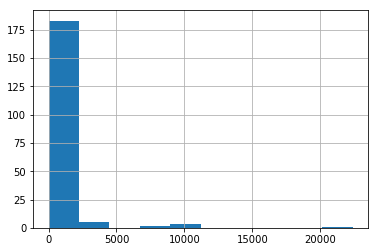

In [124]:
flag_df["area"].hist()

*Filtrowanie danych*

In [129]:
# filtrowanie wierszy
flag_df[flag_df["landmass"] == 3].mean()

landmass        3.000000
zone            1.600000
area          139.514286
population     13.857143
language        5.142857
religion        1.742857
bars            0.628571
stripes         1.285714
colours         3.000000
red             0.828571
green           0.200000
blue            0.514286
gold            0.428571
white           0.771429
black           0.171429
orange          0.057143
circles         0.028571
crosses         0.285714
saltires        0.028571
quarters        0.028571
sunstars        0.142857
crescent        0.000000
triangle        0.028571
icon            0.257143
animate         0.114286
text            0.028571
dtype: float64

In [131]:
flag_df[flag_df["landmass"] == 3]["area"].mean()

139.5142857142857

In [132]:
flag_df[flag_df["landmass"] == 3]

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
11,Austria,3,1,84,8,4,0,0,3,2,...,0,0,0,0,0,0,0,0,red,red
16,Belgium,3,1,31,10,6,0,3,0,3,...,0,0,0,0,0,0,0,0,black,red
26,Bulgaria,3,1,111,9,5,6,0,3,5,...,0,0,1,0,0,1,1,0,white,red
44,Cyprus,3,1,9,1,6,1,0,0,3,...,0,0,0,0,0,1,1,0,white,white
45,Czechoslovakia,3,1,128,15,5,6,0,0,3,...,0,0,0,0,1,0,0,0,white,red
46,Denmark,3,1,43,5,6,1,0,0,2,...,0,0,0,0,0,0,0,0,red,red
55,Faeroes,3,4,1,0,6,1,0,0,3,...,0,0,0,0,0,0,0,0,white,white
58,Finland,3,1,337,5,9,1,0,0,2,...,0,0,0,0,0,0,0,0,white,white


In [133]:
# złożone filtry
flag_df[(flag_df["landmass"] == 3) & (flag_df["language"] == 5)].mean()

landmass        3.000000
zone            1.000000
area          184.000000
population     20.000000
language        5.000000
religion        6.000000
bars            0.000000
stripes         1.666667
colours         3.333333
red             1.000000
green           0.333333
blue            0.666667
gold            0.333333
white           1.000000
black           0.000000
orange          0.000000
circles         0.000000
crosses         0.000000
saltires        0.000000
quarters        0.000000
sunstars        0.333333
crescent        0.000000
triangle        0.333333
icon            0.333333
animate         0.333333
text            0.000000
dtype: float64

In [134]:
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [135]:
# indeksowanie po nazwach wierszy i kolumn
flag_df.loc[0:5, "name":"zone"]

,name,landmass,zone
0,Afghanistan,5,1
1,Albania,3,1
2,Algeria,4,1
3,American-Samoa,6,3
4,Andorra,3,1
5,Angola,4,2


In [136]:
flag_df.loc[0:5, ["name","zone"]]

,name,zone
0,Afghanistan,1
1,Albania,1
2,Algeria,1
3,American-Samoa,3
4,Andorra,1
5,Angola,2


In [138]:
# indeksowanie po numerach wierszy i kolumn
flag_df.iloc[:6, :3]

,name,landmass,zone
0,Afghanistan,5,1
1,Albania,3,1
2,Algeria,4,1
3,American-Samoa,6,3
4,Andorra,3,1
5,Angola,4,2


*Tworzenie i usuwanie kolumn*

In [139]:
# tworzenie nowej kolumny
flag_df["temp"] = flag_df["area"] * flag_df["population"]
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,temp
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,black,green,10368
1,Albania,3,1,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,red,red,87
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,1,1,0,0,0,0,green,white,47760
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,0
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,0


In [140]:
# usuwanie kolumny
del flag_df["temp"]
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [141]:
flag_df["temp"] = flag_df["area"] > 100
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,temp
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,black,green,True
1,Albania,3,1,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,red,red,False
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,1,1,0,0,0,0,green,white,True
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,False
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,False


In [142]:
flag_df.pop("temp")

0       True
1      False
2       True
3      False
4      False
5       True
6      False
7      False
8       True
9       True
10      True
11     False
12     False
13     False
14      True
15     False
16     False
17     False
18      True
19     False
20     False
21      True
22      True
23      True
24     False
25     False
26      True
27      True
28      True
29     False
       ...  
164    False
165     True
166    False
167     True
168    False
169     True
170     True
171    False
172    False
173    False
174     True
175     True
176    False
177    False
178    False
179     True
180     True
181     True
182    False
183     True
184     True
185    False
186    False
187     True
188     True
189    False
190     True
191     True
192     True
193     True
Name: temp, dtype: bool

In [143]:
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [144]:
flag_df["temp"] = 42
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,temp
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,black,green,42
1,Albania,3,1,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,red,red,42
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,1,1,0,0,0,0,green,white,42
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,42
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,42


In [145]:
flag_df.drop(["temp"], axis=1, inplace=True) 
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### ZADANIA
1. Utwórz kolumnę `lines` będącą sumą kolumn `bars` i `stripes`
2. Utwórz kolumnę `rgb` zawierającą elementy typu string (object) powstałe poprzez konkatenację wartości kolumn `red`, `green` i `blue`
3. Usuń kolumny `lines` oraz `rgb`

In [149]:
# 1
flag_df["lines"] = flag_df["bars"] + flag_df["stripes"]
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,lines
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,black,green,3
1,Albania,3,1,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,red,red,0
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,1,1,0,0,0,0,green,white,2
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,0
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,3


In [150]:
# 2

import numpy as np

flag_df["rgb"] = flag_df[("red")].astype(str) + flag_df[("green")].astype(str) + flag_df[("blue")].astype(str)
flag_df.head()


,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,sunstars,crescent,triangle,icon,animate,text,topleft,botright,lines,rgb
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,1,0,0,1,0,0,black,green,3,110
1,Albania,3,1,29,3,6,6,0,0,3,...,1,0,0,0,1,0,red,red,0,100
2,Algeria,4,1,2388,20,8,2,2,0,3,...,1,1,0,0,0,0,green,white,2,110
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,1,1,1,0,blue,red,0,101
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,blue,red,3,101


In [151]:
# 3

flag_df.drop(["lines", "rgb"], axis=1, inplace=True) 
flag_df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


#### Stosowanie funkcji

In [152]:
# apply w- funkcja do każdej z kolumn
flag_df.apply(np.max)

name          Zimbabwe
landmass             6
zone                 4
area             22402
population        1008
language            10
religion             7
bars                 5
stripes             14
colours              8
red                  1
green                1
blue                 1
gold                 1
white                1
black                1
orange               1
mainhue          white
circles              4
crosses              2
saltires             1
quarters             4
sunstars            50
crescent             1
triangle             1
icon                 1
animate              1
text                 1
topleft          white
botright         white
dtype: object

In [153]:
flag_df["name"].apply(lambda x: x[0] == "Z")

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
164    False
165    False
166    False
167    False
168    False
169    False
170    False
171    False
172    False
173    False
174    False
175    False
176    False
177    False
178    False
179    False
180    False
181    False
182    False
183    False
184    False
185    False
186    False
187    False
188    False
189    False
190    False
191     True
192     True
193     True
Name: name, dtype: bool

In [154]:
flag_df["mainhue"].apply(lambda x: x + " " + x)

0        green green
1            red red
2        green green
3          blue blue
4          gold gold
5            red red
6        white white
7            red red
8          blue blue
9          blue blue
10         blue blue
11           red red
12         blue blue
13           red red
14       green green
15         blue blue
16         gold gold
17         blue blue
18       green green
19           red red
20     orange orange
21           red red
22         blue blue
23       green green
24         blue blue
25         gold gold
26           red red
27           red red
28           red red
29           red red
           ...      
164        blue blue
165        blue blue
166          red red
167          red red
168          red red
169      green green
170          red red
171      green green
172          red red
173          red red
174          red red
175          red red
176        blue blue
177        blue blue
178      green green
179        gold gold
180          

In [155]:
flag_df[flag_df["name"].apply(lambda x: x[0] == "Z")].head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown
193,Zimbabwe,4,2,391,8,10,5,0,7,5,...,0,0,1,0,1,1,1,0,green,green


In [156]:
# map 
flag_df["mainhue"].map({"white" : "wh", "blue" : "bl"})

0      NaN
1      NaN
2      NaN
3       bl
4      NaN
5      NaN
6       wh
7      NaN
8       bl
9       bl
10      bl
11     NaN
12      bl
13     NaN
14     NaN
15      bl
16     NaN
17      bl
18     NaN
19     NaN
20     NaN
21     NaN
22      bl
23     NaN
24      bl
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
164     bl
165     bl
166    NaN
167    NaN
168    NaN
169    NaN
170    NaN
171    NaN
172    NaN
173    NaN
174    NaN
175    NaN
176     bl
177     bl
178    NaN
179    NaN
180    NaN
181     wh
182     wh
183     wh
184    NaN
185    NaN
186    NaN
187    NaN
188    NaN
189    NaN
190    NaN
191    NaN
192    NaN
193    NaN
Name: mainhue, dtype: object

In [157]:
short_names = {x : x[:2] for x in flag_df["mainhue"].unique()}
short_names

{'black': 'bl',
 'blue': 'bl',
 'brown': 'br',
 'gold': 'go',
 'green': 'gr',
 'orange': 'or',
 'red': 're',
 'white': 'wh'}

In [158]:
flag_df["mainhue"].map(short_names)

0      gr
1      re
2      gr
3      bl
4      go
5      re
6      wh
7      re
8      bl
9      bl
10     bl
11     re
12     bl
13     re
14     gr
15     bl
16     go
17     bl
18     gr
19     re
20     or
21     re
22     bl
23     gr
24     bl
25     go
26     re
27     re
28     re
29     re
       ..
164    bl
165    bl
166    re
167    re
168    re
169    gr
170    re
171    gr
172    re
173    re
174    re
175    re
176    bl
177    bl
178    gr
179    go
180    re
181    wh
182    wh
183    wh
184    re
185    re
186    go
187    re
188    re
189    re
190    re
191    gr
192    gr
193    gr
Name: mainhue, dtype: object

In [159]:
# replace
flag_df.replace({"mainhue": short_names, "topleft": short_names}).loc[:, ["mainhue", "topleft"]].head()

,mainhue,topleft
0,gr,bl
1,re,re
2,gr,gr
3,bl,bl
4,go,bl


### ZADANIA
1. Utwórz kolumnę `landmass_name` poprzez zmapowanie nazw do wartości w kolumnie `landmass`(mapowanie znajduje się w opisie zbioru)
2. Utwórz kolumnę `temp` na podstawie kolumny `landmass` poprzez przemnożenie liczb parzystych przez 4 a nieparzystych przez 3
3. Usuń kolumnę `temp`

In [205]:
#1 

#Landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 5=Asia, 6=Oceania 

flag_df["landmass_name"] = flag_df["landmass"]

flag_df["landmass_name"].map({ 1 : "N.America", 2 : "S.America", 3 : "Europe", 4 : "Africa", 5 : "Asia", 6 :"Oceania" })

#flag_df["mainhue"].map({"white" : "wh", "blue" : "bl"})

0           Asia
1         Europe
2         Africa
3        Oceania
4         Europe
5         Africa
6      N.America
7      N.America
8      S.America
9      S.America
10       Oceania
11        Europe
12     N.America
13          Asia
14          Asia
15     N.America
16        Europe
17     N.America
18        Africa
19     N.America
20          Asia
21     S.America
22        Africa
23     S.America
24     N.America
25          Asia
26        Europe
27        Africa
28          Asia
29        Africa
         ...    
164       Africa
165       Europe
166       Europe
167         Asia
168         Asia
169       Africa
170         Asia
171       Africa
172      Oceania
173    S.America
174       Africa
175         Asia
176    N.America
177      Oceania
178         Asia
179       Africa
180       Europe
181    S.America
182    N.America
183    N.America
184         Asia
185      Oceania
186       Europe
187    S.America
188         Asia
189      Oceania
190       Europe
191       Afri

In [176]:
# 2



def test(x):
    if x%2 == 0:
        out = x*4
    else:
        out = x*3
    return out

# flag_df["mainhue"].apply(lambda x: x + " " + x)



flag_df["temp"] = flag_df["landmass"].apply(lambda c: x* 4 if x% 2 == 0 else x*3)





ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [177]:
# 3


flag_df.drop(["temp"], axis=1, inplace=True) 



ValueError: labels ['temp'] not contained in axis

#### Grupowanie

In [178]:
flag_df.groupby(["mainhue"])["area"].mean()

mainhue
black      367.800000
blue       414.575000
brown       75.500000
gold       345.263158
green      827.225806
orange    1450.750000
red        914.070423
white      651.363636
Name: area, dtype: float64

In [179]:
flag_df.groupby(["mainhue"])["area", "population"].describe()

area   population
mainhue                                 
black   count      5.000000     5.000000
        mean     367.800000    23.800000
        std      391.271900    28.048173
        min       28.000000     2.000000
        25%       98.000000     3.000000
        50%      249.000000     6.000000
        75%      463.000000    47.000000
        max     1001.000000    61.000000
blue    count     40.000000    40.000000
        mean     414.575000     5.225000
        std     1329.352433     9.877422
        min        0.000000     0.000000
        25%        0.000000     0.000000
        50%       21.500000     1.000000
        75%      122.750000     5.250000
        max     7690.000000    48.000000
brown   count      2.000000     2.000000
        mean      75.500000     8.000000
        std       91.216775    11.313708
        min       11.000000     0.000000
        25%       43.250000     4.000000
        50%       75.500000     8.000000
        75%      107.750000    12.000000
        max      140.000000    16.000000
gold    count     19.000000    19.000000
        mean     345.263158     6.894737
        std      450.909062     7.607706
        min        0.000000     0.000000
        25%        5.000000     0.000000
        50%      108.000000     6.000000
...                     ...          ...
green   std     1588.223047    31.736923
        min        0.000000     0.000000
        25%       29.000000     1.000000
        50%      215.000000     3.000000
        75%      935.000000    19.000000
        max     8512.000000   119.000000
orange  count      4.000000     4.000000
        mean    1450.750000   179.750000
        std     1336.595270   336.393990
        min       47.000000     1.000000
        25%      927.500000     4.000000
        50%     1244.000000    17.000000
        75%     1767.250000   192.750000
        max     3268.000000   684.000000
red     count     71.000000    71.000000
        mean     914.070423    30.366197
        std     3066.724606   123.692850
        min        0.000000     0.000000
        25%       12.500000     1.000000
        50%      181.000000     6.000000
        75%      476.000000    14.500000
        max    22402.000000  1008.000000
white   count     22.000000    22.000000
        mean     651.363636    26.181818
        std     1999.789740    54.129155
        min        0.000000     0.000000
        25%        1.000000     0.000000
        50%       95.000000     3.000000
        75%      320.500000    30.750000
        max     9363.000000   231.000000

[64 rows x 2 columns]

In [180]:
flag_df.groupby(["mainhue"])["area", "population"].agg([np.mean, np.std, np.min, np.max])

area                           population                   \
                mean          std amin   amax        mean         std amin   
mainhue                                                                      
black     367.800000   391.271900   28   1001   23.800000   28.048173    2   
blue      414.575000  1329.352433    0   7690    5.225000    9.877422    0   
brown      75.500000    91.216775   11    140    8.000000   11.313708    0   
gold      345.263158   450.909062    0   1284    6.894737    7.607706    0   
green     827.225806  1588.223047    0   8512   18.967742   31.736923    0   
orange   1450.750000  1336.595270   47   3268  179.750000  336.393990    1   
red       914.070423  3066.724606    0  22402   30.366197  123.692850    0   
white     651.363636  1999.789740    0   9363   26.181818   54.129155    0   

               
         amax  
mainhue        
black      61  
blue       48  
brown      16  
gold       28  
green     119  
orange    684  
red      1008  
white     231

In [181]:
flag_df.groupby(["mainhue", "colours"])["area", "population"].max()

area  population
mainhue colours                   
black   2           28           6
        3          249          61
        4         1001          47
blue    2         2777          28
        3         7690          28
        4          300          48
        5            0           0
        6           12           5
        7           18           1
        8           23           0
brown   2           11           0
        3          140          16
gold    3         1284          28
        4           66          15
        5          783          13
green   1         1760           3
        2         2150          90
        3         2388          31
        4         8512         119
        5          648          16
        6            0           0
orange  3         1267           5
        4         3268         684
        5         1221          29
red     2        22402        1008
        3         1648          56
        4         2506          22
        5          111          10
        6          407           3
        7          912          22
white   2         2176         118
        3         9363         231
        4           99          39
        6            0           0

In [182]:
flag_df.groupby(flag_df["name"].apply(lambda x: x[0]))["name"].count()

name
A    12
B    18
C    16
D     4
E     5
F     7
G    14
H     4
I     9
J     3
K     4
L     7
M    16
N    12
O     1
P     9
Q     1
R     2
S    24
T    10
U     7
V     4
W     1
Y     1
Z     3
Name: name, dtype: int64

In [183]:
flag_df.groupby(["landmass"]).agg({"area" : ["max","min"]})

area    
            max min
landmass           
1          9976   0
2          8512   5
3           547   0
4          2506   0
5         22402   0
6          7690   0

### ZADANIA
1. Pogrupuj dane ze względu na to czy liczba kolorów na fladze jest parzysta, następnie oblicz maksymalną powierzchnię krajów w tak powstałych grupach
2. Pogrupuj dane ze względu na kontynent oraz język, następnie oblicz lizbę krajów, maksymalną powierzchnię oraz średnią liczbę symboli gwiazd lub słońc

In [188]:
# 1

# flag_df["temp"] = flag_df["landmass"].apply(lambda c: x* 4 if x% 2 == 0 else x*3)

flag_df.groupby(flag_df["colours"].apply(lambda x: "even" if x%2 ==0 else "odd"))["area"].max()




colours
even    22402
odd      9363
Name: area, dtype: int64

In [189]:
# 2


flag_df.groupby(["landmass_name", "language"]).agg({"name" : "count", "area" : "max", "sunstars" : "mean"})


# flag_df.groupby(flag_df["name"].apply(lambda x: x[0]))["name"].count()

name   area   sunstars
landmass_name language                        
1             1           19   9976   3.894737
              2            9   1973   0.777778
              3            1     28   0.000000
              6            2   2176   3.000000
2             1            3    215   0.000000
              2           11   2777   1.181818
              3            1     91   0.000000
              6            2   8512  11.500000
3             1            3    245   0.000000
              2            1    505   0.000000
              3            2    547   0.000000
              4            6    249   0.000000
              5            3    313   0.333333
              6           17    450   0.235294
              9            2    337   0.000000
              10           1      0   0.000000
4             1            6    239   0.166667
              3           12   1284   0.833333
              6            4   1221   1.000000
              8            7   2506   0.571429
              10          23   1247   0.478261
5             5            1  22402   1.000000
              6            4   3268   0.250000
              7            4   9561   2.750000
              8           12   2150   0.666667
              9            2    781   1.000000
              10          16   1566   1.375000
6             1           12   7690   4.583333
              3            1      4   1.000000
              6            1     15   0.000000
              10           6   1904   1.666667

=====================================================================================================================

=====================================================================================================================

#### ★★ Hierarchiczne indeksy

https://pandas.pydata.org/pandas-docs/stable/advanced.html

In [ ]:
test_df = flag_df.groupby(["mainhue", "colours"])["area", "population"].agg([np.min, np.max])
test_df

In [ ]:
test_df.index

In [ ]:
test_df.columns

In [ ]:
# kolumny
test_df["area"]

In [ ]:
test_df["area"]["amin"]

In [ ]:
test_df["amin"]

In [ ]:
# index
test_df.loc["black",]

In [ ]:
test_df.loc[("black", 2),]

In [ ]:
# kolumny + index
test_df.loc["black", "area"]

In [ ]:
test_df.loc[("black", 2), "area"]

### ZADANIA

1. Dostań się na 3 różne sposoby do maksymalnej wartości populacji dla krajów o flagach z mainhue = gold oraz colours = 3
2. Dwukrotnie zwiększ wartości maksymalnej powierzchni dla krajów o dwukolorowych flagach

=====================================================================================================================

=====================================================================================================================

#### Tabele kontyngencji i pivoty

In [190]:
# tabela kontyngencji
pd.crosstab(flag_df["landmass"], flag_df["language"])

language,1,2,3,4,5,6,7,8,9,10
landmass,,,,,,,,,,
1,19,9,1,0,0,2,0,0,0,0
2,3,11,1,0,0,2,0,0,0,0
3,3,1,2,6,3,17,0,0,2,1
4,6,0,12,0,0,4,0,7,0,23
5,0,0,0,0,1,4,4,12,2,16
6,12,0,1,0,0,1,0,0,0,6


In [191]:
pd.crosstab(flag_df["landmass"], flag_df["language"], normalize=True)

language,1,2,3,4,5,6,7,8,9,10
landmass,,,,,,,,,,
1,0.097938,0.046392,0.005155,0.000000,0.000000,0.010309,0.000000,0.000000,0.000000,0.000000
2,0.015464,0.056701,0.005155,0.000000,0.000000,0.010309,0.000000,0.000000,0.000000,0.000000
3,0.015464,0.005155,0.010309,0.030928,0.015464,0.087629,0.000000,0.000000,0.010309,0.005155
4,0.030928,0.000000,0.061856,0.000000,0.000000,0.020619,0.000000,0.036082,0.000000,0.118557
5,0.000000,0.000000,0.000000,0.000000,0.005155,0.020619,0.020619,0.061856,0.010309,0.082474
6,0.061856,0.000000,0.005155,0.000000,0.000000,0.005155,0.000000,0.000000,0.000000,0.030928


In [192]:
pd.crosstab([flag_df["landmass"], flag_df["zone"]], flag_df["language"])

language       1   2   3   4   5   6   7   8   9   10
landmass zone                                        
1        4     19   9   1   0   0   2   0   0   0   0
2        3      1   8   0   0   0   1   0   0   0   0
         4      2   3   1   0   0   1   0   0   0   0
3        1      0   0   2   6   3  14   0   0   2   1
         4      3   1   0   0   0   3   0   0   0   0
4        1      0   0   6   0   0   1   0   5   0   7
         2      2   0   1   0   0   1   0   0   0  15
         3      1   0   0   0   0   0   0   0   0   0
         4      3   0   5   0   0   2   0   2   0   1
5        1      0   0   0   0   1   4   4  12   2  16
6        1      2   0   0   0   0   0   0   0   0   3
         2      6   0   0   0   0   1   0   0   0   3
         3      4   0   1   0   0   0   0   0   0   0

In [193]:
pd.crosstab([flag_df["landmass"], flag_df["zone"]], [flag_df["language"], flag_df["religion"]])

language      1            2     3           ... 9     10                     \
religion       0   1  4  5  0  6  0  1  2  5 ...  6  7  0  1  2  3  4   5  6   
landmass zone                                ...                               
1        4     0  19  0  0  8  1  1  0  0  0 ...  0  0  0  0  0  0  0   0  0   
2        3     0   1  0  0  8  0  0  0  0  0 ...  0  0  0  0  0  0  0   0  0   
         4     0   1  1  0  3  0  1  0  0  0 ...  0  0  0  0  0  0  0   0  0   
3        1     0   0  0  0  0  0  2  0  0  0 ...  1  0  1  0  0  0  0   0  0   
         4     1   2  0  0  1  0  0  0  0  0 ...  0  0  0  0  0  0  0   0  0   
4        1     0   0  0  0  0  0  0  1  2  2 ...  0  0  0  1  2  0  0   4  0   
         2     0   1  1  0  0  0  0  0  1  0 ...  0  0  0  2  0  0  0  13  0   
         3     0   1  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0   0  0   
         4     0   0  0  3  0  0  0  0  3  2 ...  0  0  0  0  0  0  0   1  0   
5        1     0   0  0  0  0  0  0  0  0  0 ...  0  1  0  0  4  5  1   0  4   
6        1     0   2  0  0  0  0  0  0  0  0 ...  0  0  1  2  0  0  0   0  0   
         2     0   5  0  1  0  0  0  0  0  0 ...  0  0  0  2  1  0  0   0  0   
         3     0   4  0  0  0  0  1  0  0  0 ...  0  0  0  0  0  0  0   0  0   

language          
religion       7  
landmass zone     
1        4     0  
2        3     0  
         4     0  
3        1     0  
         4     0  
4        1     0  
         2     0  
         3     0  
         4     0  
5        1     2  
6        1     0  
         2     0  
         3     0  

[13 rows x 36 columns]

In [194]:
# pivot
flag_df.pivot_table(["bars", "stripes", "colours"], ["landmass"], aggfunc='mean')

,bars,colours,stripes
landmass,,,
1,0.580645,3.870968,1.451613
2,0.352941,3.705882,2.176471
3,0.628571,3.000000,1.285714
4,0.673077,3.519231,1.942308
5,0.179487,3.153846,1.666667
6,0.000000,3.900000,0.400000


In [195]:
flag_df.pivot_table(["area"], ["landmass_name"], aggfunc="sum")

,area
landmass_name,
1,24163
2,20589
3,4883
4,27784
5,47693
6,10697


In [196]:
dummy_df = pd.DataFrame({"id" : ["a", "b"], "1" : [4,5], "2" : [5,6], "3" : [6,7]})
dummy_df

,1,2,3,id
0,4,5,6,a
1,5,6,7,b


In [197]:
# unpivot
pd.melt(dummy_df, id_vars=["id"], value_vars=["1", "2", "3"])

,id,variable,value
0,a,1,4
1,b,1,5
2,a,2,5
3,b,2,6
4,a,3,6
5,b,3,7


### ZADANIA

1. Stwórz tabelę kontyngencji pierwsza litera nazwy kraju x kontynent
2. Stwórz pivot gdzie osią będą pierwsze litery nazw karajów a wartościami średnia wielkość populacji oraz średnia liczba kolorów

In [207]:
#1 tab = flag_df.




#pd.crosstab(flag_df["name"].apply( lambda x: x[0], flag_df["landmass_name"]))



In [201]:
# 2




#flag_df.pivot_table(["name", "stripes", "colours"], ["population"], aggfunc='mean')


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Nowe dane

Popularne wskaźniki dotyczące krajów.

Opisy wskaźników znajdują się w pliku `6b411fa3-2348-4a1e-808d-080fcf97ca1a_Definition and Source.csv`

Źródło danych:

http://databank.worldbank.org/data/indicator/NY.GDP.MKTP.CD/1ff4a498/Popular-Indicators#

In [208]:
indicators_df = pd.read_csv("Popular Indicators/6b411fa3-2348-4a1e-808d-080fcf97ca1a_Data.csv", sep=",")
indicators_df.head()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20093756,20966463,21979923,23064851,24118979,25070798,25893450,26616792,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027,3060173,3051010,3039616,3026939,3011487,2992547,2970017,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703
2,"Population, total",SP.POP.TOTL,Algeria,DZA,31183660,31592153,31995046,32403514,32831096,33288437,33777915,34300076,34860715,35465760,36117637,36819558,37565847,38338562,39113313,39871528
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,57521,58175,58731,59117,59264,59118,58650,57903,57030,56227,55637,55320,55230,55307,55437,55537
4,"Population, total",SP.POP.TOTL,Andorra,AND,65390,67341,70049,73182,76244,78867,80991,82683,83861,84462,84449,83751,82431,80788,79223,78014


*Porządki*

In [209]:
indicators_df["Series Name"].unique()

array(['Population, total', 'Population growth (annual %)',
       'Surface area (sq. km)',
       'Poverty headcount ratio at national poverty lines (% of population)',
       'GNI, Atlas method (current US$)',
       'GNI per capita, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'GNI per capita, PPP (current international $)',
       'Income share held by lowest 20%',
       'Life expectancy at birth, total (years)',
       'Fertility rate, total (births per woman)',
       'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Contraceptive prevalence, any methods (% of women ages 15-49)',
       'Births attended by skilled health staff (% of total)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Primary completion rate, total (% of relevant age group)',
       'School en

In [210]:
indicators_df.tail()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
11067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11070,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11071,Last Updated: 11/14/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
indicators_df = indicators_df.dropna(axis=0, how="any", subset=["Series Code"])
indicators_df.tail()

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
11062,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Virgin Islands (U.S.),VIR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
11063,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,West Bank and Gaza,PSE,2.7981989243576,1.22278475878897,5.70951585976626,4.40303221730887,3.00417498638594,4.10725070715932,3.84234125624782,1.85974379351109,9.88999788691851,2.75393485083151,3.749157275971,2.87724358495937,2.77908768282495,1.72439933626921,1.73298510037453,1.4316114581047
11064,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,"Yemen, Rep.",YEM,4.58999999999981,11.9115912929855,12.2385339389711,10.8323607023241,12.5150951495208,11.8112639374949,10.8447986914257,7.90511778988729,18.9762574318077,5.40776098077526,11.1748338605043,19.5435617131149,9.88538714484848,10.9684421500194,8.10472583623948,..
11065,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Zambia,ZMB,26.0304117888121,21.3937821792546,22.2333446430947,21.4015783901995,17.9677891087286,18.324439701174,9.01957247226486,10.6573496000153,12.4455793463192,13.3952546325895,8.50176133365265,6.42939681072336,6.57589970757695,6.97767605490317,7.80687553566328,10.1105928909618
11066,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,Zimbabwe,ZWE,..,..,..,..,..,..,..,..,..,..,3.03447888394065,3.47779729257469,3.72108721983356,1.63162201890278,-0.212939904613785,-2.40949998777139


In [213]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11067 entries, 0 to 11066
Data columns (total 20 columns):
Series Name      11067 non-null object
Series Code      11067 non-null object
Country Name     11067 non-null object
Country Code     11067 non-null object
2000 [YR2000]    11067 non-null object
2001 [YR2001]    11067 non-null object
2002 [YR2002]    11067 non-null object
2003 [YR2003]    11067 non-null object
2004 [YR2004]    11067 non-null object
2005 [YR2005]    11067 non-null object
2006 [YR2006]    11067 non-null object
2007 [YR2007]    11067 non-null object
2008 [YR2008]    11067 non-null object
2009 [YR2009]    11067 non-null object
2010 [YR2010]    11067 non-null object
2011 [YR2011]    11067 non-null object
2012 [YR2012]    11067 non-null object
2013 [YR2013]    11067 non-null object
2014 [YR2014]    11067 non-null object
2015 [YR2015]    11067 non-null object
dtypes: object(20)
memory usage: 1.8+ MB


In [217]:
indicators_df.columns = [x[:4] if x[0] == "2" else x for x in indicators_df.columns]

In [218]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11067 entries, 0 to 11066
Data columns (total 20 columns):
Series Name     11067 non-null object
Series Code     11067 non-null object
Country Name    11067 non-null object
Country Code    11067 non-null object
2000            11067 non-null object
2001            11067 non-null object
2002            11067 non-null object
2003            11067 non-null object
2004            11067 non-null object
2005            11067 non-null object
2006            11067 non-null object
2007            11067 non-null object
2008            11067 non-null object
2009            11067 non-null object
2010            11067 non-null object
2011            11067 non-null object
2012            11067 non-null object
2013            11067 non-null object
2014            11067 non-null object
2015            11067 non-null object
dtypes: object(20)
memory usage: 1.8+ MB


In [219]:
year_cols = [str(x) for x in range(2000,2016)]
year_cols

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [220]:
indicators_df[year_cols].apply(lambda x: pd.to_numeric(x, errors="coerce"))

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,2.009376e+07,2.096646e+07,2.197992e+07,2.306485e+07,2.411898e+07,2.507080e+07,2.589345e+07,2.661679e+07,2.729403e+07,2.800433e+07,2.880317e+07,2.970860e+07,3.069696e+07,3.173169e+07,3.275802e+07,3.373649e+07
1,3.089027e+06,3.060173e+06,3.051010e+06,3.039616e+06,3.026939e+06,3.011487e+06,2.992547e+06,2.970017e+06,2.947314e+06,2.927519e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.895092e+06,2.889104e+06,2.880703e+06
2,3.118366e+07,3.159215e+07,3.199505e+07,3.240351e+07,3.283110e+07,3.328844e+07,3.377792e+07,3.430008e+07,3.486072e+07,3.546576e+07,3.611764e+07,3.681956e+07,3.756585e+07,3.833856e+07,3.911331e+07,3.987153e+07
3,5.752100e+04,5.817500e+04,5.873100e+04,5.911700e+04,5.926400e+04,5.911800e+04,5.865000e+04,5.790300e+04,5.703000e+04,5.622700e+04,5.563700e+04,5.532000e+04,5.523000e+04,5.530700e+04,5.543700e+04,5.553700e+04
4,6.539000e+04,6.734100e+04,7.004900e+04,7.318200e+04,7.624400e+04,7.886700e+04,8.099100e+04,8.268300e+04,8.386100e+04,8.446200e+04,8.444900e+04,8.375100e+04,8.243100e+04,8.078800e+04,7.922300e+04,7.801400e+04
5,1.644092e+07,1.698327e+07,1.757265e+07,1.820337e+07,1.886572e+07,1.955254e+07,2.026240e+07,2.099769e+07,2.175942e+07,2.254955e+07,2.336913e+07,2.421856e+07,2.509615e+07,2.599834e+07,2.692047e+07,2.785930e+07
6,8.358400e+04,8.505700e+04,8.626600e+04,8.729300e+04,8.825700e+04,8.925300e+04,9.030100e+04,9.138100e+04,9.247800e+04,9.358100e+04,9.466100e+04,9.571900e+04,9.677700e+04,9.782400e+04,9.887500e+04,9.992300e+04
7,3.705745e+07,3.747151e+07,3.788937e+07,3.830938e+07,3.872870e+07,3.914549e+07,3.955889e+07,3.997022e+07,4.038239e+07,4.079941e+07,4.122389e+07,4.165688e+07,4.209674e+07,4.253992e+07,4.298152e+07,4.341776e+07
8,3.069588e+06,3.050655e+06,3.033897e+06,3.017806e+06,3.000612e+06,2.981259e+06,2.958500e+06,2.933056e+06,2.908220e+06,2.888584e+06,2.877311e+06,2.875581e+06,2.881922e+06,2.893509e+06,2.906220e+06,2.916950e+06
9,9.085300e+04,9.289800e+04,9.499200e+04,9.701700e+04,9.873700e+04,1.000310e+05,1.008320e+05,1.012200e+05,1.013530e+05,1.014530e+05,1.016690e+05,1.020530e+05,1.025770e+05,1.031870e+05,1.037950e+05,1.043410e+05


In [221]:
indicators_df[year_cols] = indicators_df[year_cols].apply(lambda x: pd.to_numeric(x, errors="coerce"))

In [222]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11067 entries, 0 to 11066
Data columns (total 20 columns):
Series Name     11067 non-null object
Series Code     11067 non-null object
Country Name    11067 non-null object
Country Code    11067 non-null object
2000            7730 non-null float64
2001            7586 non-null float64
2002            7925 non-null float64
2003            7842 non-null float64
2004            7982 non-null float64
2005            8108 non-null float64
2006            8145 non-null float64
2007            8344 non-null float64
2008            8065 non-null float64
2009            8086 non-null float64
2010            8149 non-null float64
2011            8115 non-null float64
2012            8331 non-null float64
2013            8051 non-null float64
2014            8041 non-null float64
2015            7481 non-null float64
dtypes: float64(16), object(4)
memory usage: 1.8+ MB


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### Łączenie DataFrame'ów

In [225]:
df1 = flag_df[flag_df["landmass_name"] == "Europe"]
df2 = flag_df[flag_df["landmass_name"] == "Asia"]
df3 = indicators_df[indicators_df["Series Name"] == "GDP per capita (current US$)"]

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [226]:
print("wymiary df1: ", df1.shape)
print("wymiary df2: ", df2.shape)
print("wymiary df3: ", df3.shape)

NameError: name 'df1' is not defined

In [ ]:
# dołączanie wierszowe
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], ignore_index=True)

In [ ]:
df1.append(df2)

In [ ]:
df1.append(df2, ignore_index=True)

In [ ]:
# DFy nie muszą mieć wszystkich kolumn
pd.concat([df1[["name", "zone"]], df2], ignore_index=True, sort=False)

In [ ]:
df1[["name", "zone"]].append(df2, ignore_index=True, sort=False)

In [ ]:
# łączenie kolumnowe
pd.concat([df1[["name", "zone"]], df2[["landmass", "area"]]], axis=1, sort=False)

In [ ]:
pd.concat([df1[["name", "zone"]].reset_index(drop=True), 
           df2[["landmass", "area"]].reset_index(drop=True)], 
          axis=1, sort=False)

In [ ]:
pd.concat([df1[["name", "zone", "landmass"]].reset_index(drop=True), 
           df2[["landmass", "area"]].reset_index(drop=True)], 
          axis=1, sort=False)

In [ ]:
# joiny
pd.merge(left=df3, right=df2, how="inner", left_on="Country Name", right_on="name")

In [ ]:
pd.merge(left=df3, right=df2, how="outer", left_on="Country Name", right_on="name")

In [ ]:
pd.merge(left=df3, right=df2, how="left", left_on="Country Name", right_on="name")

In [ ]:
pd.merge(left=df3, right=df2, how="right", left_on="Country Name", right_on="name")

### ZADANIA

1. Wykorzystując zbiór `flag_df` oblicz procentowy udział powierzchni oraz populacji danego kraju w powierzchni i populcji kontynentu na którym się znajduje
2. Wykorzystując zbiór `indicators_df` oblicz procentowe zalesienie poszczególnych krajów w roku 2000 oraz 2015